# Simulation result analysis for cost valley weights study

## Section I, trajectory analysis

In [4]:
from Config import Config
from usr_func.checkfolder import checkfolder
import numpy as np
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm
from matplotlib.gridspec import GridSpec

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 20

filepath = "./npy/CV/"
print(os.listdir(filepath))

c = Config()
plg_b = c.get_polygon_border()
plg_o = c.get_polygon_obstacle()


['P4', 'P3', 'P2', 'IVR.npy', '.DS_Store', 'IVR_rmse.npy', 'EIBV_vr.npy', 'IVR_vr.npy', 'EQUAL_vr.npy', 'EIBV_rmse.npy', 'EIBV_ibv.npy', 'EIBV.npy', 'P1', 'EQUAL_ibv.npy', 'IVR_ibv.npy', 'EQUAL.npy', 'EQUAL_rmse.npy']


In [5]:
figpath = "./../../fig/Sim_2DNidelva/Cases/"
d_eq = np.load(filepath + "EQUAL.npy")
d_eibv = np.load(filepath + "EIBV.npy")
d_ivr = np.load(filepath + "IVR.npy")
print(os.listdir(figpath))

['P_022.png', 'P_036.png', 'P_037.png', 'P_023.png', 'P3', 'P_035.png', 'P_021.png', 'P_009.png', 'P_008.png', 'P_020.png', 'P_034.png', 'P2', 'P_018.png', 'P_030.png', 'P_024.png', '.DS_Store', 'P_025.png', 'P_031.png', 'P_019.png', 'P_027.png', 'P_033.png', 'P_032.png', 'P_026.png', 'P_041.png', 'P_055.png', 'P_069.png', 'P_068.png', 'P_054.png', 'P_040.png', 'P_056.png', 'P_042.png', 'P_043.png', 'P_057.png', 'P_080.png', 'P_053.png', 'P_047.png', 'P_046.png', 'P_052.png', 'P_078.png', 'P_044.png', 'P_050.png', 'P_051.png', 'P_045.png', 'P_079.png', 'P_060.png', 'P_074.png', 'P_048.png', 'P_049.png', 'P_075.png', 'P_061.png', 'P_077.png', 'P_063.png', 'P1', 'P_062.png', 'P_076.png', 'P_072.png', 'P_066.png', 'P_067.png', 'P_073.png', 'P_059.png', 'P_065.png', 'P_071.png', 'P_070.png', 'P_064.png', 'P_058.png', 'P_003.png', 'P_017.png', 'P_016.png', 'P_002.png', 'P_014.png', 'P_000.png', 'P_028.png', 'P_029.png', 'P_001.png', 'P_015.png', 'P_039.png', 'P_011.png', 'P_005.png', 'P_004

In [ ]:
d_eq.shape

In [6]:
def plotf(data, i, title):
    ax.plot(plg_b[:, 1], plg_b[:, 0], 'r-.')
    ax.plot(plg_o[:, 1], plg_o[:, 0], 'r-.')
    ax.set_xlabel("East")
    ax.set_ylabel("North")
    ax.set_title(title)
    ax.set_aspect("equal")
    for j in range(data.shape[0]):
        ax.plot(data[j, :i, 1], data[j, :i, 0], 'k.-', alpha=.1)
        
for i in tqdm(range(d_eq.shape[1])):
    fig = plt.figure(figsize=(40, 12))
    gs = GridSpec(nrows=1, ncols=3)
    
    ax = fig.add_subplot(gs[0])
    plotf(d_eq, i, "EIBV: 1.0, IVR: 1.0")

    ax = fig.add_subplot(gs[1])
    plotf(d_eibv, i, "EIBV: 1.9, IVR: 0.1")
    
    ax = fig.add_subplot(gs[2])
    plotf(d_ivr, i, "EIBV: 0.1, IVR: 1.9")
        
    plt.savefig(figpath + "P_{:03d}.png".format(i))
    plt.close("all")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:33<00:00,  2.45it/s]


In [ ]:
pb = c.get_polygon_border()
po = c.get_polygon_obstacle()

In [ ]:
s1 = np.load(filepath + "eibv_ivr_1.90_0.10.npy")
s2 = np.load(filepath + "eibv_ivr_0.10_1.90.npy")
s3 = np.load(filepath + "eibv_ivr_1.00_1.00.npy")

def plotf(s, i): 
    plt.plot(pb[:, 1], pb[:, 0], 'r-.')
    plt.plot(po[:, 1], po[:, 0], 'r-.')
    for j in range(s.shape[0]):
        plt.plot(s[j, :i, 1], s[j, :i, 0], 'k.-', alpha=.1)
    plt.gca().set_aspect('equal')
    plt.xlabel("East")
    plt.ylabel("North")
#     plt.title("Iteration: " + str(i))

for i in tqdm(range(s1.shape[1])):

    fig = plt.figure(figsize=(30, 10))
    gs = GridSpec(nrows=1, ncols=3)
    ax = fig.add_subplot(gs[0])
    plotf(s1, i)
    ax.set_title("EIBV: {:.2f}, IVR: {:.2f}".format(1.9, .1))

    ax = fig.add_subplot(gs[1])
    plotf(s2, i)
    ax.set_title("EIBV: {:.2f}, IVR: {:.2f}".format(.1, 1.9))

    ax = fig.add_subplot(gs[2])
    plotf(s3, i)
    ax.set_title("EIBV: {:.2f}, IVR: {:.2f}".format(1., 1.))

    plt.savefig(figpath + "P_{:03d}.png".format(i))
    plt.close("all")
#     plt.show()
#     if i == 2: 
#         break

## Section II, metric analysis

In [7]:
metrics = ["ibv", "vr", "rmse"]

In [8]:
for m in metrics: 
    print(m.upper())

IBV
VR
RMSE


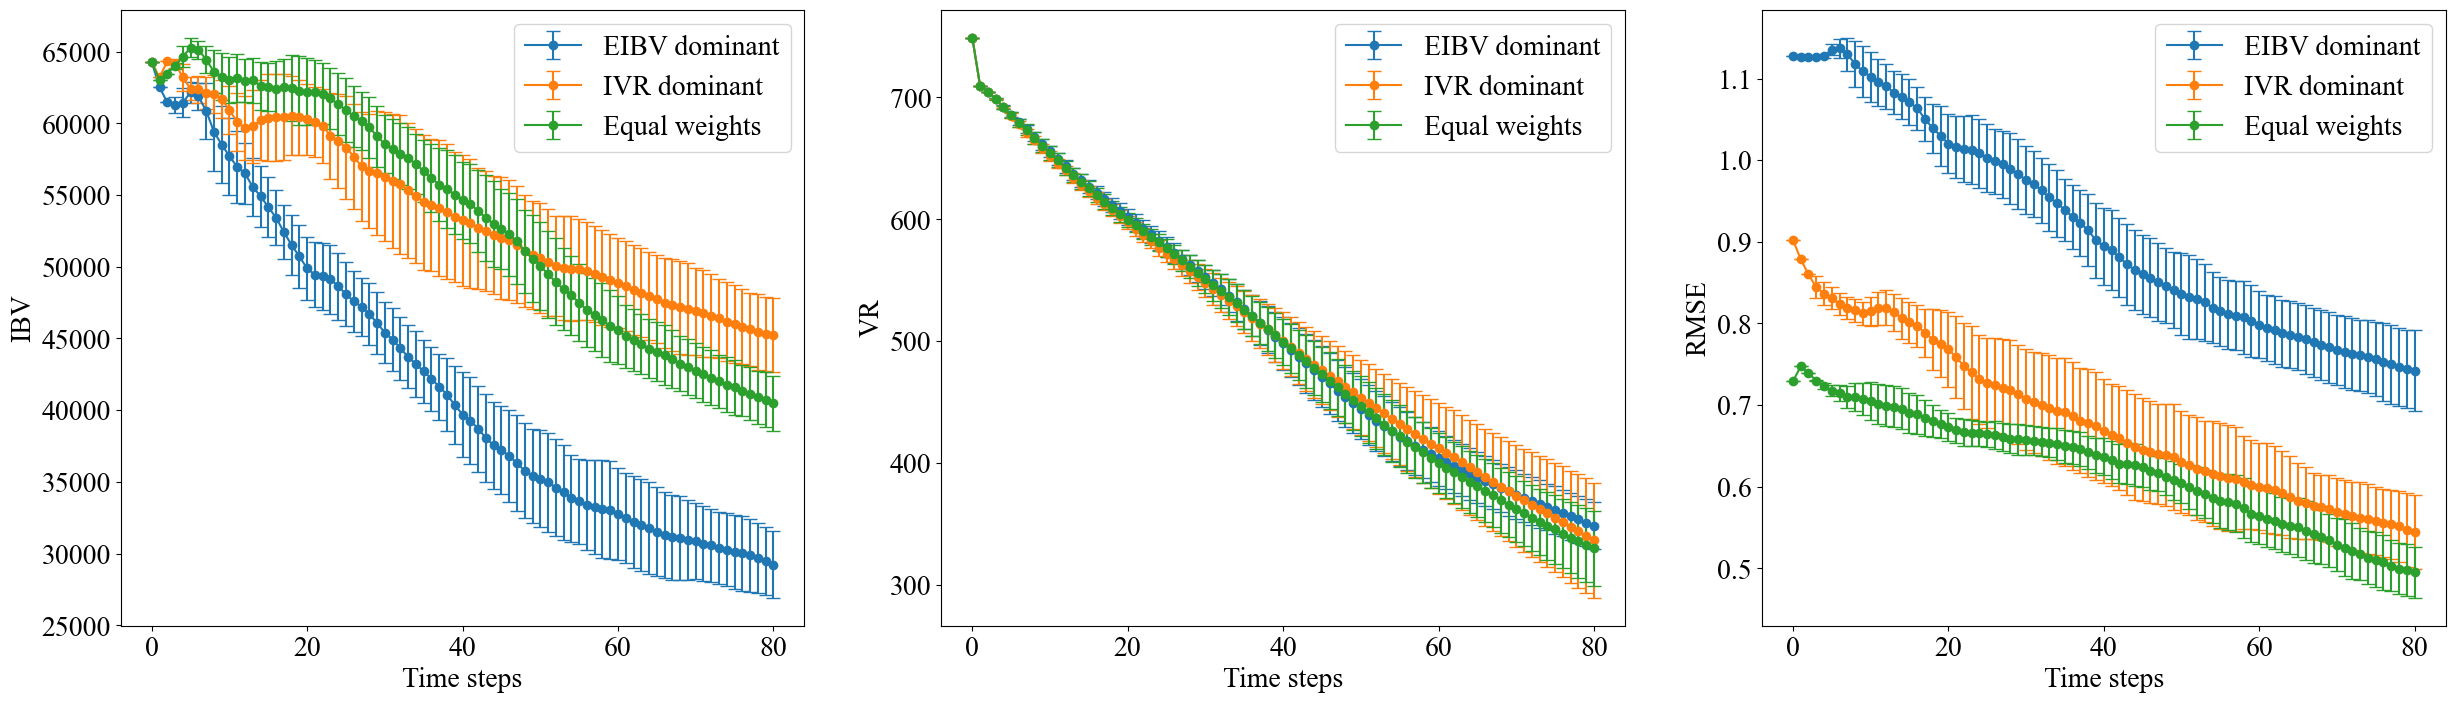

In [9]:
fig = plt.figure(figsize=(30, 8))
gs = GridSpec(nrows=1, ncols=3)
counter = 0

for metric in metrics:
    d_eibv = np.load(filepath + "EIBV_" + metric + ".npy")
    d_ivr = np.load(filepath + "IVR_" + metric + ".npy")
    d_eq = np.load(filepath + "EQUAL_" + metric + ".npy")

    N = d_eibv.shape[0]
    hx = np.arange(d_eibv.shape[1])
    
    ax = fig.add_subplot(gs[counter])
    ax.errorbar(hx, y=np.mean(d_eibv, axis=0), yerr=np.std(d_eibv, axis=0), fmt="-o", capsize=5,
                         label="EIBV dominant")
    ax.errorbar(hx, y=np.mean(d_ivr, axis=0), yerr=np.std(d_ivr, axis=0), fmt="-o", capsize=5,
                         label="IVR dominant")
    ax.errorbar(hx, y=np.mean(d_eq, axis=0), yerr=np.std(d_eq, axis=0), fmt="-o", capsize=5,
                         label="Equal weights")
    plt.legend()
    plt.xlabel('Time steps')
    plt.ylabel(metric.upper())

    counter += 1



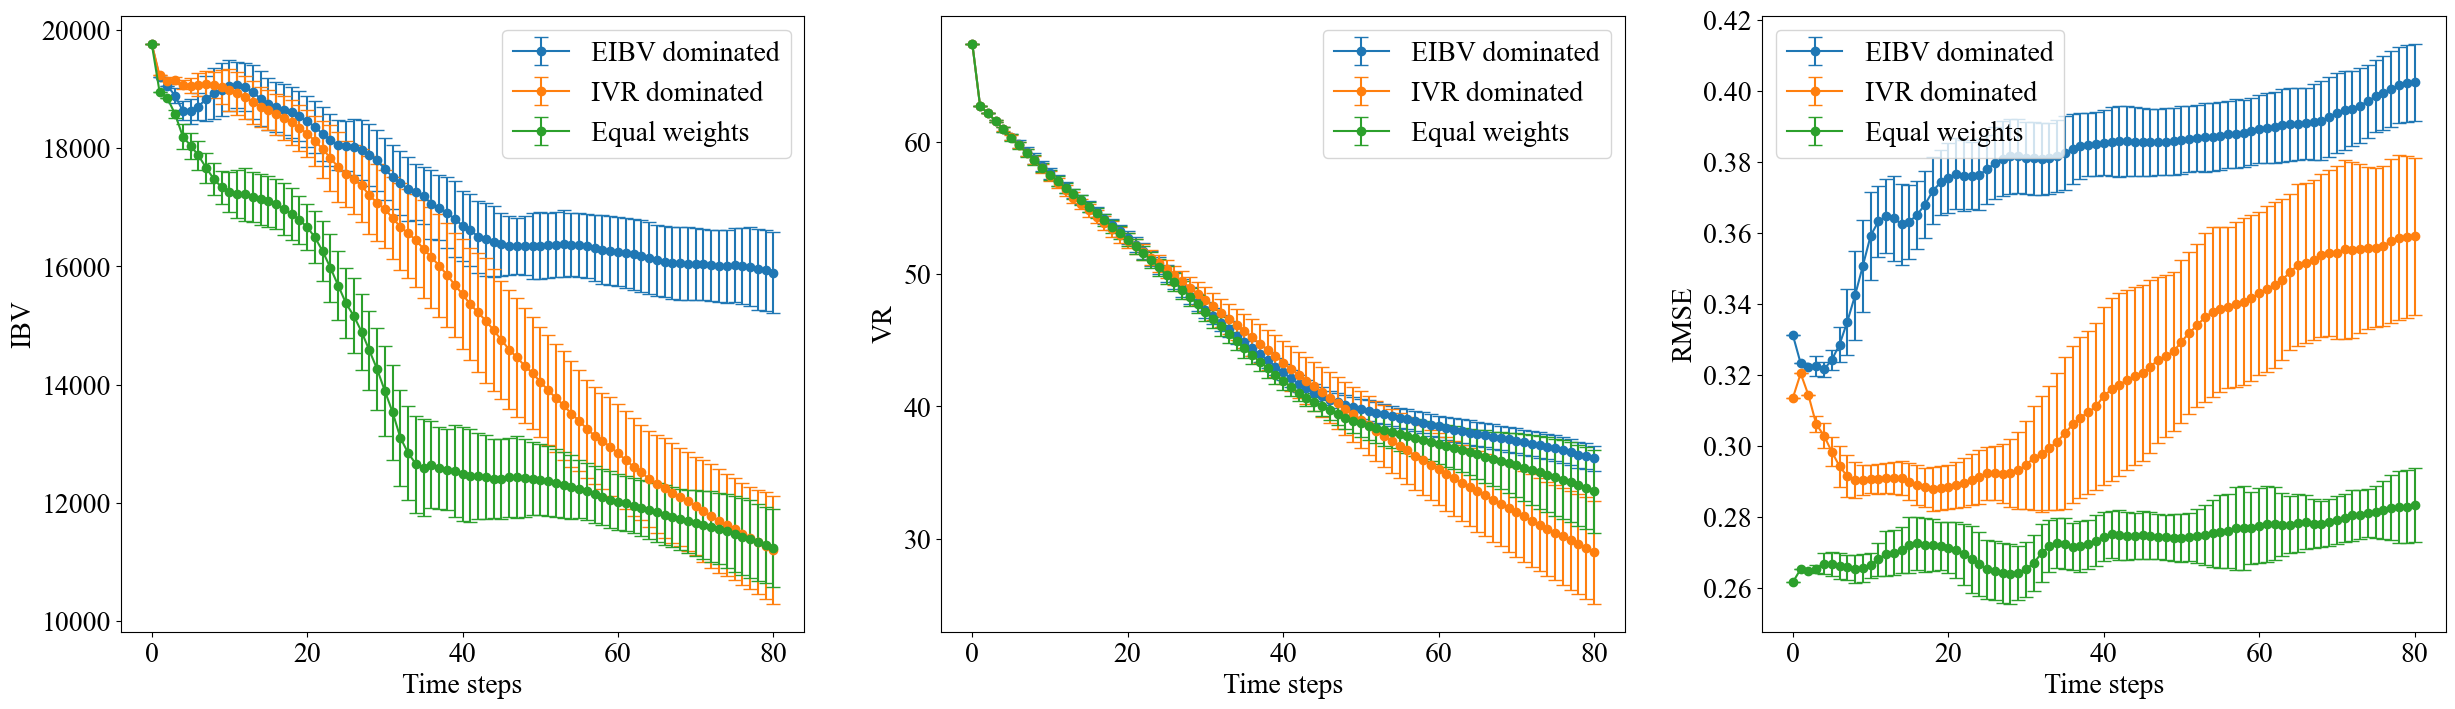

In [28]:
fig = plt.figure(figsize=(30, 8))
gs = GridSpec(nrows=1, ncols=3)
counter = 0

for metric in metrics:
    d_eibv = np.load(filepath + "../EIBV_" + metric + ".npy")
    d_ivr = np.load(filepath + "../IVR_" + metric + ".npy")
    d_eq = np.load(filepath + "../EQUAL_" + metric + ".npy")

    N = d_eibv.shape[0]
    hx = np.arange(d_eibv.shape[1])
    
    ax = fig.add_subplot(gs[counter])
    ax.errorbar(hx, y=np.mean(d_eibv, axis=0), yerr=np.std(d_eibv, axis=0), fmt="-o", capsize=5,
                         label="EIBV dominated")
    ax.errorbar(hx, y=np.mean(d_ivr, axis=0), yerr=np.std(d_ivr, axis=0), fmt="-o", capsize=5,
                         label="IVR dominated")
    ax.errorbar(hx, y=np.mean(d_eq, axis=0), yerr=np.std(d_eq, axis=0), fmt="-o", capsize=5,
                         label="Equal weights")
    plt.legend()
    plt.xlabel('Time steps')
    plt.ylabel(metric.upper())

    counter += 1

